In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [2]:
data=pd.read_csv('CLASSIFICATION.csv')
data.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [3]:
data.shape

(3333, 21)

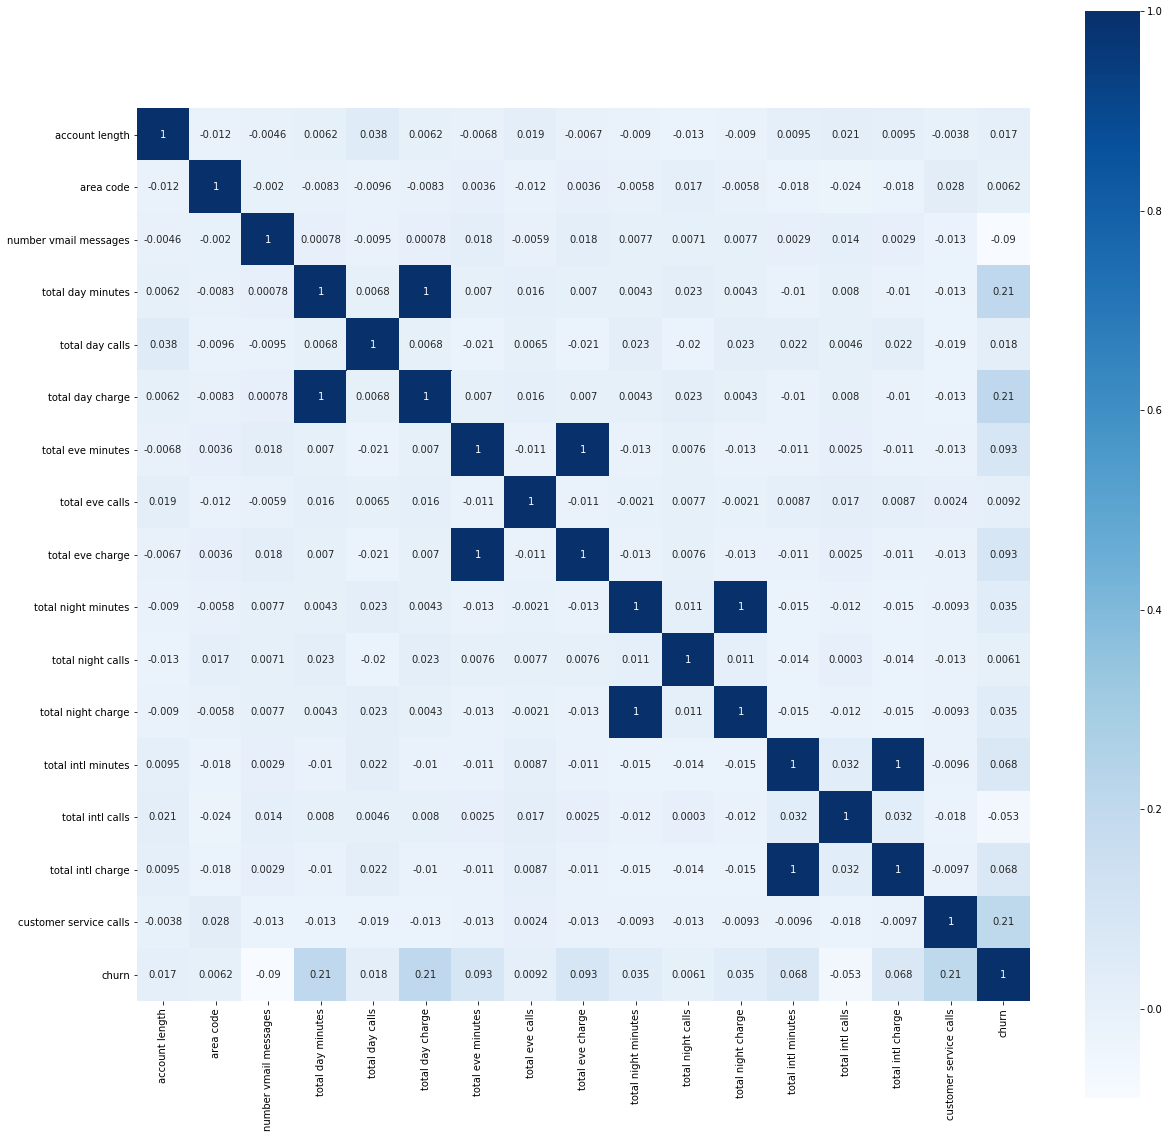

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),square=True,annot=True,cmap='Blues')

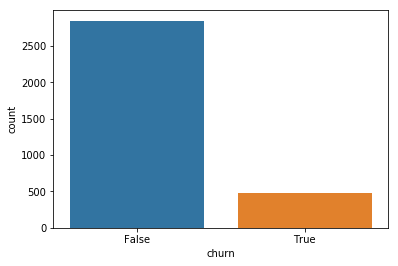

In [16]:
sns.countplot(data['churn'])

In [17]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

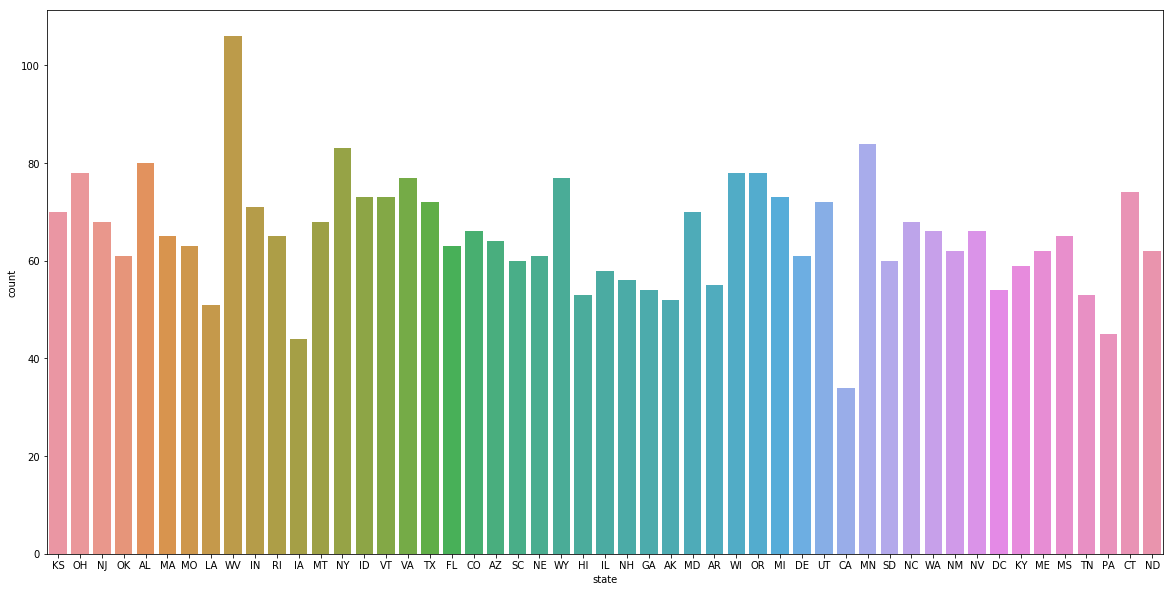

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data['state'])

In [19]:
df=data.drop(['state','account length','area code','phone number'],axis=1)
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
df['churn'] = df['churn'].apply(lambda x : 1 if x == True else 0)

In [36]:
df['international plan'] = df['international plan'].map({'no' : 0, 'yes' : 1})

In [37]:
df["voice mail plan"] = df["voice mail plan"].map({'no' : 0, 'yes' : 1})

In [38]:
df.sample(5)

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2856,0,0,0,204.4,88,34.75,137.5,111,11.69,226.0,100,10.17,10.0,4,2.70,0,0
945,0,0,0,180.0,88,30.60,145.0,77,12.33,233.7,120,10.52,11.5,6,3.11,2,0
135,1,0,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3,0
1974,0,1,20,157.8,83,26.83,161.5,56,13.73,271.5,100,12.22,8.7,2,2.35,5,1
572,1,0,0,62.3,92,10.59,275.0,82,23.38,138.7,108,6.24,10.8,3,2.92,1,0


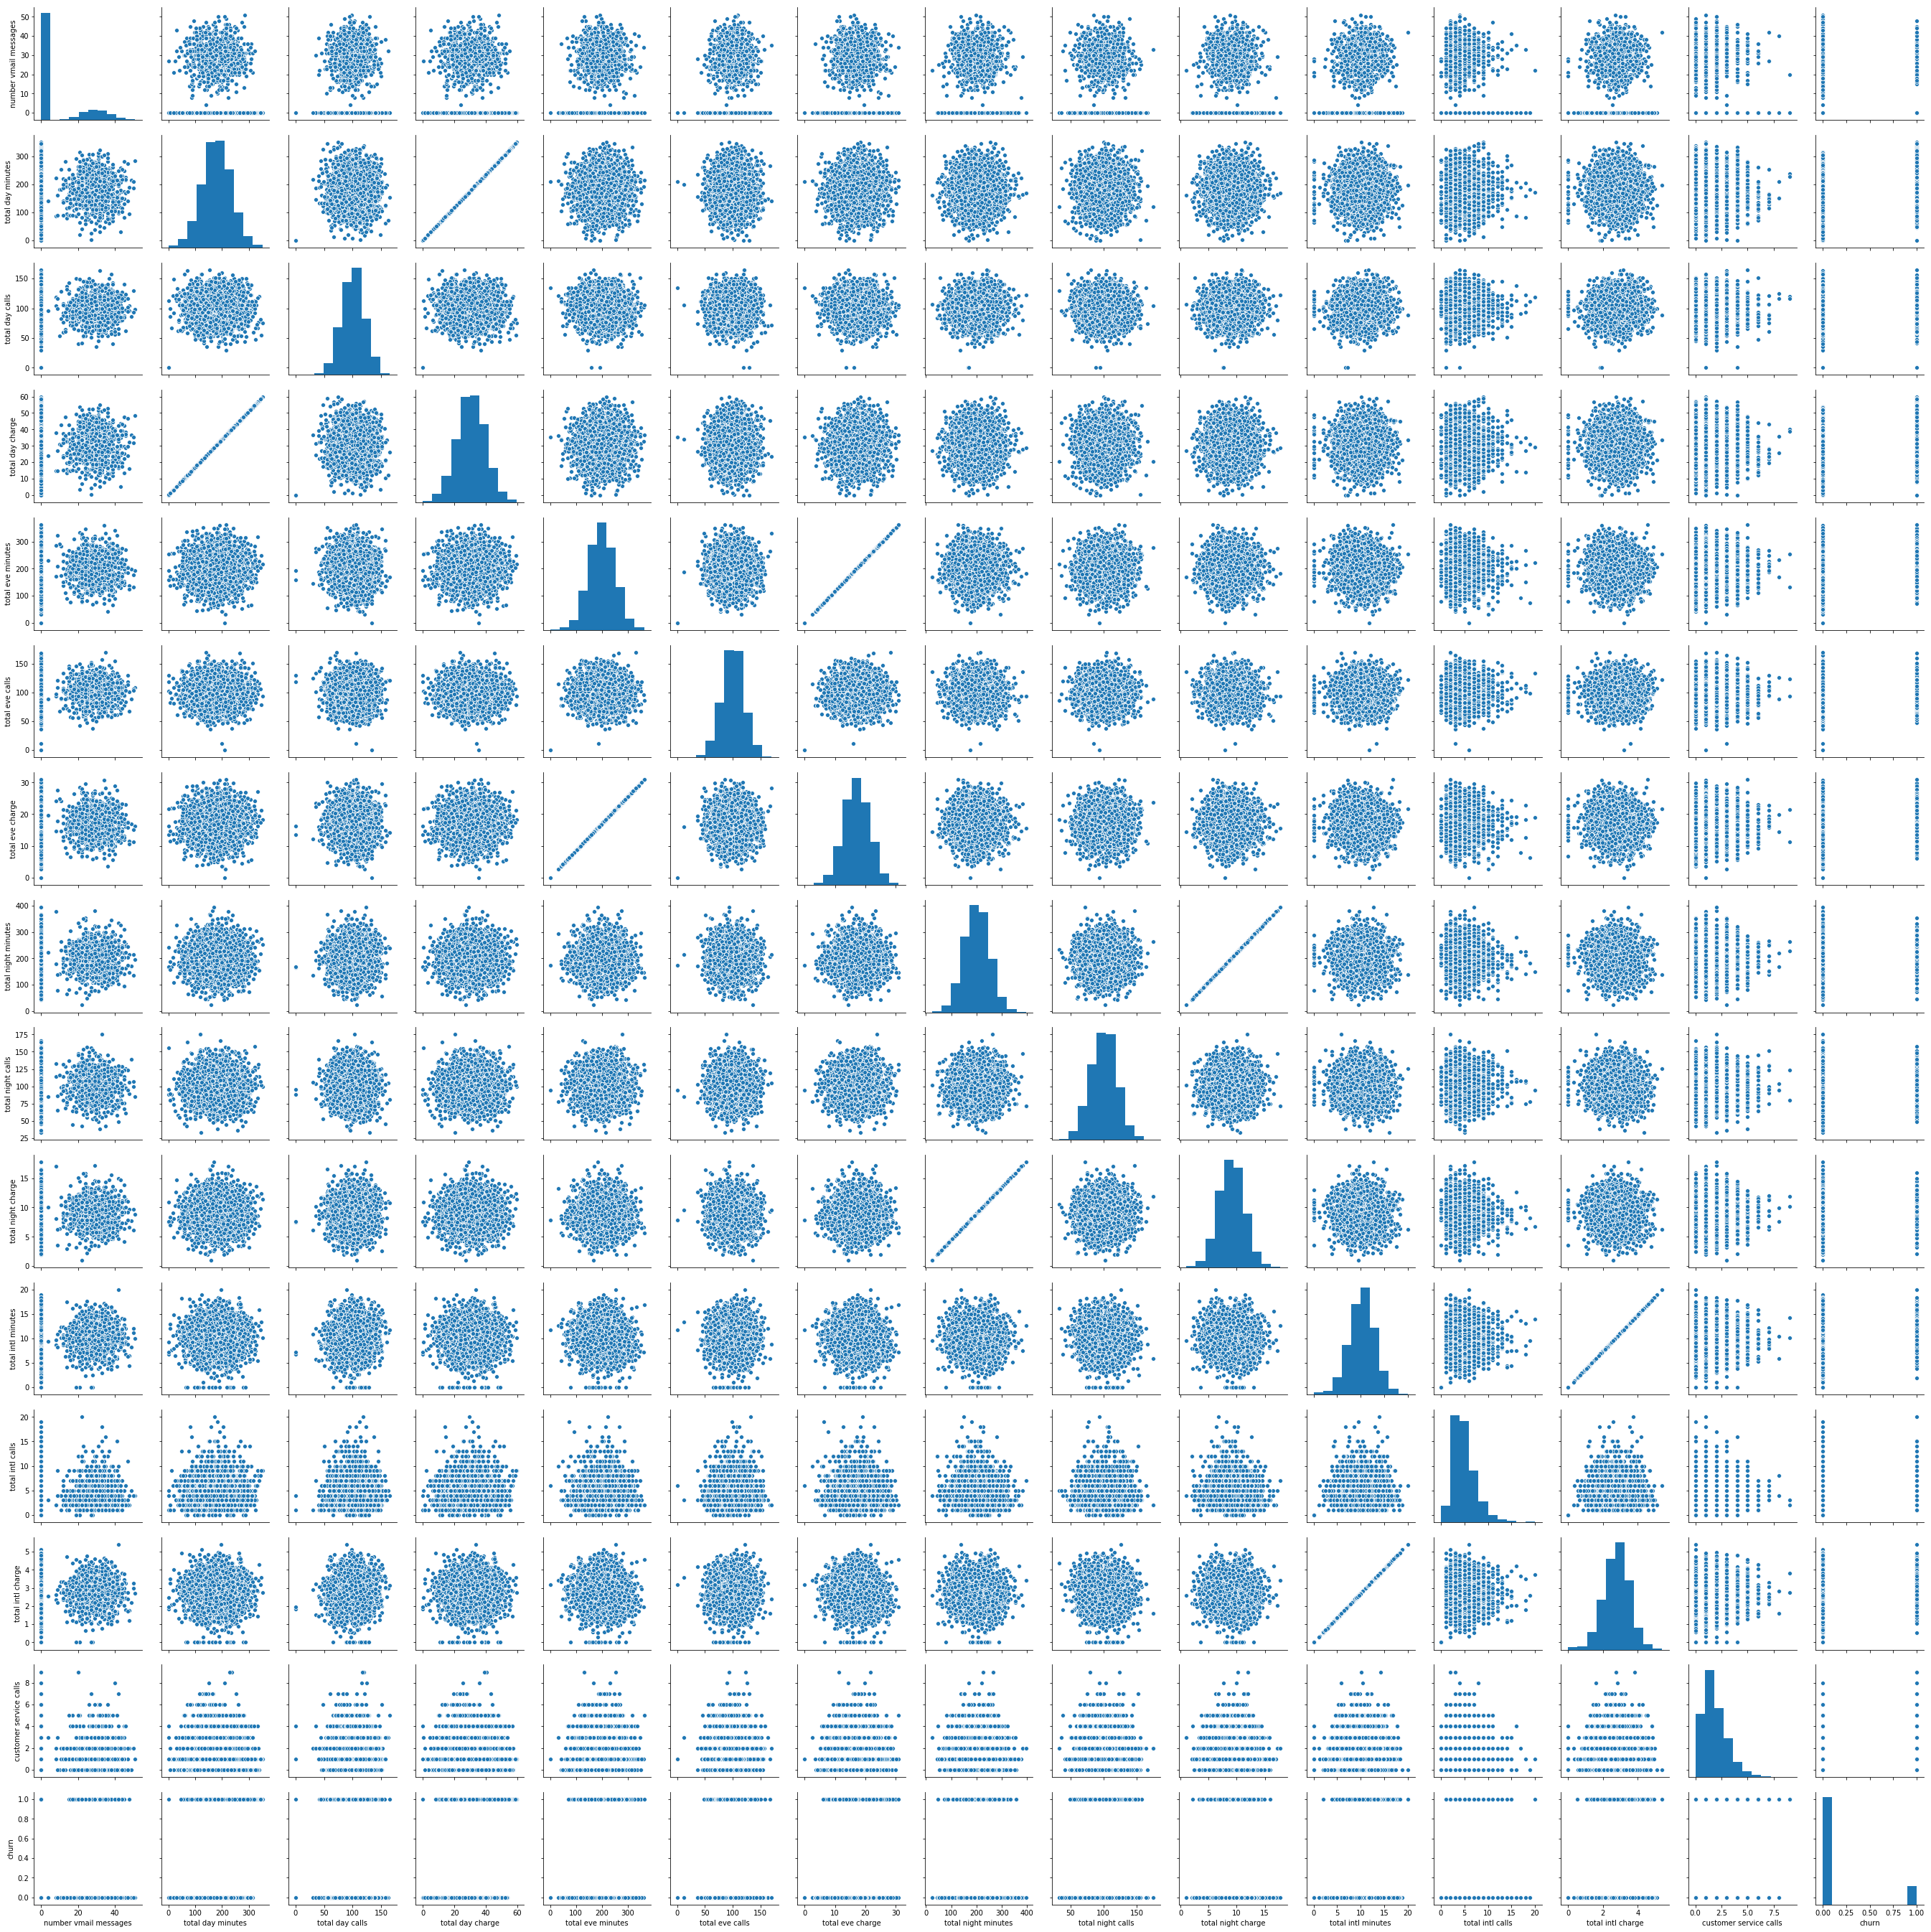

In [25]:
sns.pairplot(df)

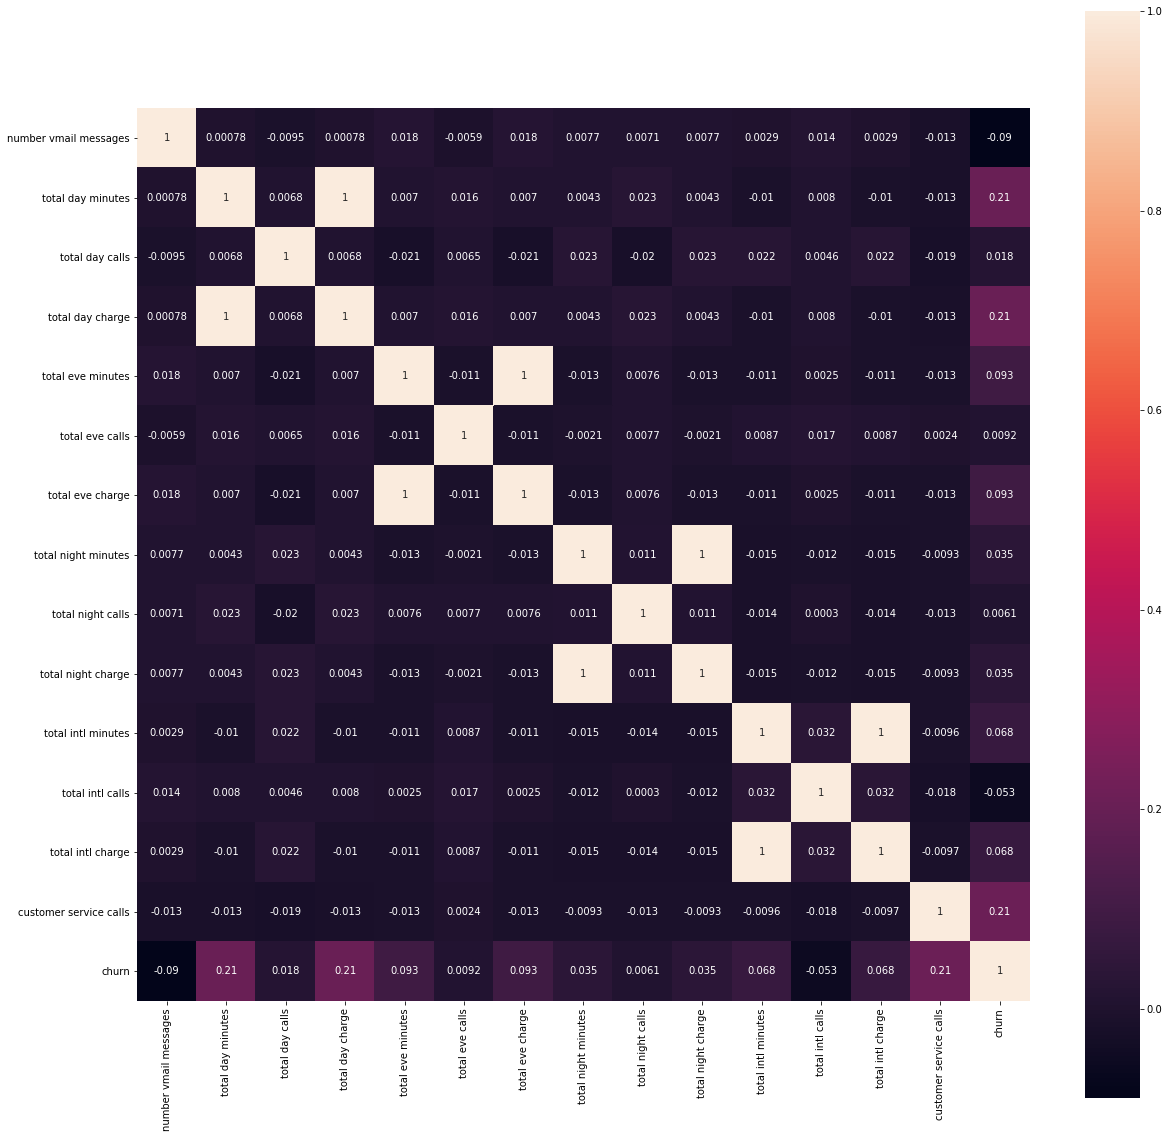

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),square=True,annot=True)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
df_scaled = scaler.fit_transform(df)

# Logistic Regression

In [44]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,1.0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1.0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,1.0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1.0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1.0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [49]:
import scipy.stats as st
import statsmodels.api as sm
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df.churn,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.323896
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           16
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.2172
Time:                        14:39:53   Log-Likelihood:                -1079.5
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                3.381e-117
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.5682      0.711    -12.058      0.000      -9.961      -7.175
international plan         2.0457      0.145     14.067      0.000       1.761       2.331
voice mail plan           -2.0262      0.574     -3.527      0.000      -3.152      -0.900
number vmail messages      0.0360      0.018      1.996      0.046       0.001       0.071
total day minutes         -0.2255      3.274     -0.069      0.945      -6.643       6.192
total day calls            0.0032      0.003      1.171      0.242      -0.002       0.009
total day charge           1.4027     19.260      0.073      0.942     -36.346      39.151
total eve minutes          0.7965      1.635      0.487      0.626      -2.408       4.001
total eve calls            0.0011      0.003      0.394      0.694      -0.004       0.007
total eve charge          -9.2859     19.237     -0.483      0.629     -46.990      28.419
total night minutes       -0.1244      0.876     -0.142      0.887      -1.842       1.593
total night calls          0.0007      0.003      0.235      0.814      -0.005       0.006
total night charge         2.8458     19.474      0.146      0.884     -35.322      41.014
total intl minutes        -4.3477      5.301     -0.820      0.412     -14.738       6.043
total intl calls          -0.0926      0.025     -3.699      0.000      -0.142      -0.044
total intl charge         16.4268     19.634      0.837      0.403     -22.055      54.908
customer service calls     0.5139      0.039     13.089      0.000       0.437       0.591
==========================================================================================
"""

In [52]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                        CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
const                   4.721271e-05   7.651262e-04  1.900623e-04   0.000
international plan      5.816101e+00   1.028495e+01  7.734228e+00   0.000
voice mail plan         4.276351e-02   4.064640e-01  1.318402e-01   0.000
number vmail messages   1.000645e+00   1.073894e+00  1.036623e+00   0.046
total day minutes       1.303439e-03   4.887077e+02  7.981232e-01   0.945
total day calls         9.978251e-01   1.008679e+00  1.003237e+00   0.242
total day charge        1.641106e-16   1.007440e+17  4.066099e+00   0.942
total eve minutes       8.996181e-02   5.467736e+01  2.217853e+00   0.626
total eve calls         9.956546e-01   1.006567e+00  1.001096e+00   0.694
total eve charge        3.911063e-21   2.198416e+12  9.272617e-05   0.629
total night minutes     1.585002e-01   4.919680e+00  8.830460e-01   0.887
total night calls       9.951116e-01   1.006255e+00  1.000668e+00   0.814
total night charge      4.567822e-16  

In [54]:
X=df.drop(['churn'],axis=1)
Y=df['churn']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=10)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)

In [64]:
print('accuracy score of Logistic Regression:',metrics.accuracy_score(Y_test,Y_pred))

accuracy score of Logistic Regression: 0.8513189448441247


In [87]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       715
           1       0.42      0.11      0.17       119

   micro avg       0.85      0.85      0.85       834
   macro avg       0.64      0.54      0.55       834
weighted avg       0.80      0.85      0.81       834



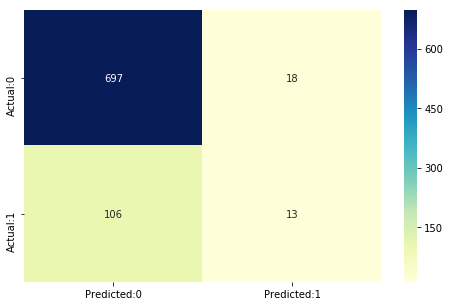

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

confusion matrix for Logistic Regression...

The confusion matrix shows 697+13 = 710 correct predictions and 106+18 = 124 incorrect ones.

True Positives: 13

True Negatives: 697

False Positives: 18 (Type I error)

False Negatives: 106 ( Type II error)

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
X1=df.drop(['churn'],axis=1)
Y1=df['churn']
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=.25,random_state=10)

In [71]:
from sklearn.tree import DecisionTreeClassifier
grid = {
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1,10),
    'criterion': ["entropy", "gini"],
}

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, grid,cv = 5)

# Fit the grid search to the data
grid_search.fit(X1_train,Y1_train)

print('The accuracy of the dtree classifier on training data',grid_search.score(X1_train,Y1_train))
print('The accuracy of the dtree classifier on test data',grid_search.score(X1_test, Y1_test))
print("Tuned hyperparameter: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))

The accuracy of the dtree classifier on training data 0.9623849539815926
The accuracy of the dtree classifier on test data 0.9448441247002398
Tuned hyperparameter: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3}
Best score: 0.9375750300120048


In [82]:
DecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 10,max_depth=7, min_samples_leaf=3)
DecisionTree.fit(X1_train, Y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [115]:
Y1_pred=DecisionTree.predict(X1_test)

In [84]:
print("the accuracy score of Decision tree",DecisionTree.score(X1_test,Y1_test))

the accuracy score of Decision tree 0.9460431654676259


In [86]:
print(metrics.classification_report(Y1_test, Y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       715
           1       0.90      0.70      0.79       119

   micro avg       0.95      0.95      0.95       834
   macro avg       0.93      0.84      0.88       834
weighted avg       0.94      0.95      0.94       834



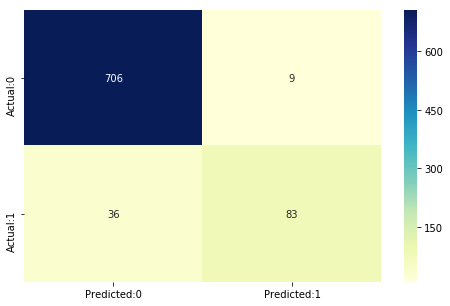

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y1_test,Y1_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Confusion matrix for Decision Tree...

The confusion matrix shows 706+83 = 789 correct predictions and 36+9 = 45 incorrect ones.

True Positives: 83

True Negatives: 706

False Positives: 9 (Type I error)

False Negatives: 36 ( Type II error)

# KNN

In [89]:
X2=df.drop(['churn'],axis=1)
Y2=df['churn']
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=.25,random_state=10)

In [91]:
# Grid CV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,6),'p':[1,2],'weights':['uniform','distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid,  cv=3) # GridSearchCV
knn_cv.fit(X2_train, Y2_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(X2_train, Y2_train)))
print('The accuracy of the knn classifier is {:+.2f} out of 1 on test data'.format(knn_cv.score(X2_test, Y2_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

The accuracy of the knn classifier is 0.90 out of 1 on training data
The accuracy of the knn classifier is +0.89 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best score: 0.885954381752701


In [92]:
knn = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
knn.fit(X2_train,Y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=1,
           weights='distance')

In [114]:
Y2_pred=knn.predict(X2_test)

In [94]:
print("the accuracy score of KNN",knn.score(X2_test,Y2_test))

the accuracy score of KNN 0.8836930455635491


In [96]:
print(metrics.classification_report(Y2_test, Y2_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       715
           1       0.69      0.34      0.45       119

   micro avg       0.88      0.88      0.88       834
   macro avg       0.79      0.66      0.69       834
weighted avg       0.87      0.88      0.87       834



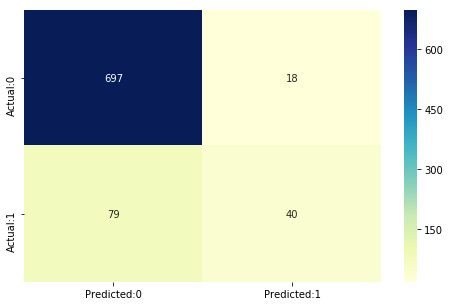

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y2_test,Y2_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Confusion matrix for KNN...

The confusion matrix shows 697+40=737 correct predictions and 79+18=97 incorrect ones.

True Positives: 40

True Negatives: 697

False Positives: 18 (Type I error)

False Negatives: 79 ( Type II error)

# Random Forest

In [99]:
X3=df.drop(['churn'],axis=1)
Y3=df['churn']
from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=.25,random_state=10)

In [102]:
kfold = model_selection.KFold(n_splits=10, random_state=10)

In [103]:
max_features = 3

In [104]:
model = RandomForestClassifier(n_estimators=100)

In [106]:
model.fit(X3_train, Y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
Y3_pred = model.predict(X3_test) 

In [110]:
print("the accuracy score of Random_Forest",model.score(X3_test,Y3_test))

the accuracy score of Random_Forest 0.9520383693045563


In [111]:
print(metrics.classification_report(Y3_test, Y3_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       715
           1       0.95      0.70      0.81       119

   micro avg       0.95      0.95      0.95       834
   macro avg       0.95      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



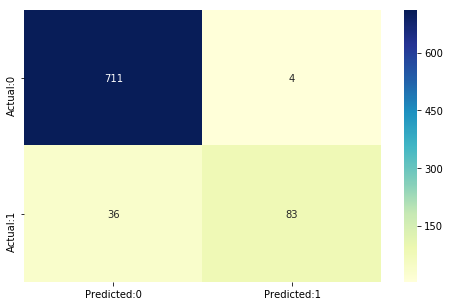

In [112]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y3_test,Y3_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Confusion matrix for Random Forest...

The confusion matrix shows 711+83=794 correct predictions and 36+4=40 incorrect ones.

True Positives: 83

True Negatives: 711

False Positives: 4 (Type I error)

False Negatives: 36 ( Type II error)

# Ensemble

In [128]:
from sklearn.ensemble import BaggingRegressor
grid = {'n_estimators': range(10,51,10),
        'bootstrap': [True,False]}

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
BR = BaggingRegressor(base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=3))
grid_search = GridSearchCV(BR, grid, 
                          cv = 5)

# Fit the grid search to the data
grid_search.fit(X1_train,Y1_train)

print('The accuracy of the BaggingRegressor on training data',grid_search.score(X1_train,Y1_train))
print('The accuracy of the BaggingRegressor on test data',grid_search.score(X1_test, Y1_test))
print("Tuned hyperparameter: {}".format(grid_search.best_params_)) 
print("Best score: {}".format(grid_search.best_score_))

The accuracy of the BaggingRegressor on training data 0.7620968978562421
The accuracy of the BaggingRegressor on test data 0.6602796544631839
Tuned hyperparameter: {'bootstrap': True, 'n_estimators': 50}
Best score: 0.6303165411290754


In [132]:
from sklearn.ensemble import BaggingRegressor
BGR = BaggingRegressor(base_estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=3),bootstrap= True, n_estimators= 50,random_state=50)    
BGR.fit(X1_train,Y1_train)
print('\nTrain Score for Random State OF 50',':',BGR.score(X1_train,Y1_train))
print('Test Score for Random State OF 50',':',BGR.score(X1_test,Y1_test))


Train Score for Random State OF 50 : 0.7649433795712484
Test Score for Random State OF 50 : 0.6807265487453723


INFERENCE

In [137]:
print("The Accuracy score of all the model...\n")
print('Logistic Regression:',metrics.accuracy_score(Y_test,Y_pred))
print("Decision tree",DecisionTree.score(X1_test,Y1_test))
print("KNN",knn.score(X2_test,Y2_test))
print("Random_Forest",model.score(X3_test,Y3_test))

The Accuracy score of all the model...

Logistic Regression: 0.8513189448441247
Decision tree 0.9460431654676259
KNN 0.8836930455635491
Random_Forest 0.9520383693045563
